In [1]:
import numpy as np
import pandas as pd

np.random.seed(0) 
import random

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

from keras.utils.vis_utils import plot_model

from sklearn.model_selection import train_test_split


Reading data

In [3]:
# (X_train, y_train), (X_test, y_test) = mnist.load_data()
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


X_train = train.drop(labels = ["label"], axis = 1)
y_train = train['label']

X_test = test

print(X_train.shape, X_test.shape)

(42000, 784) (28000, 784)


Data Analysis

In [4]:
X_train_plot = X_train.values.reshape(-1, 28, 28)

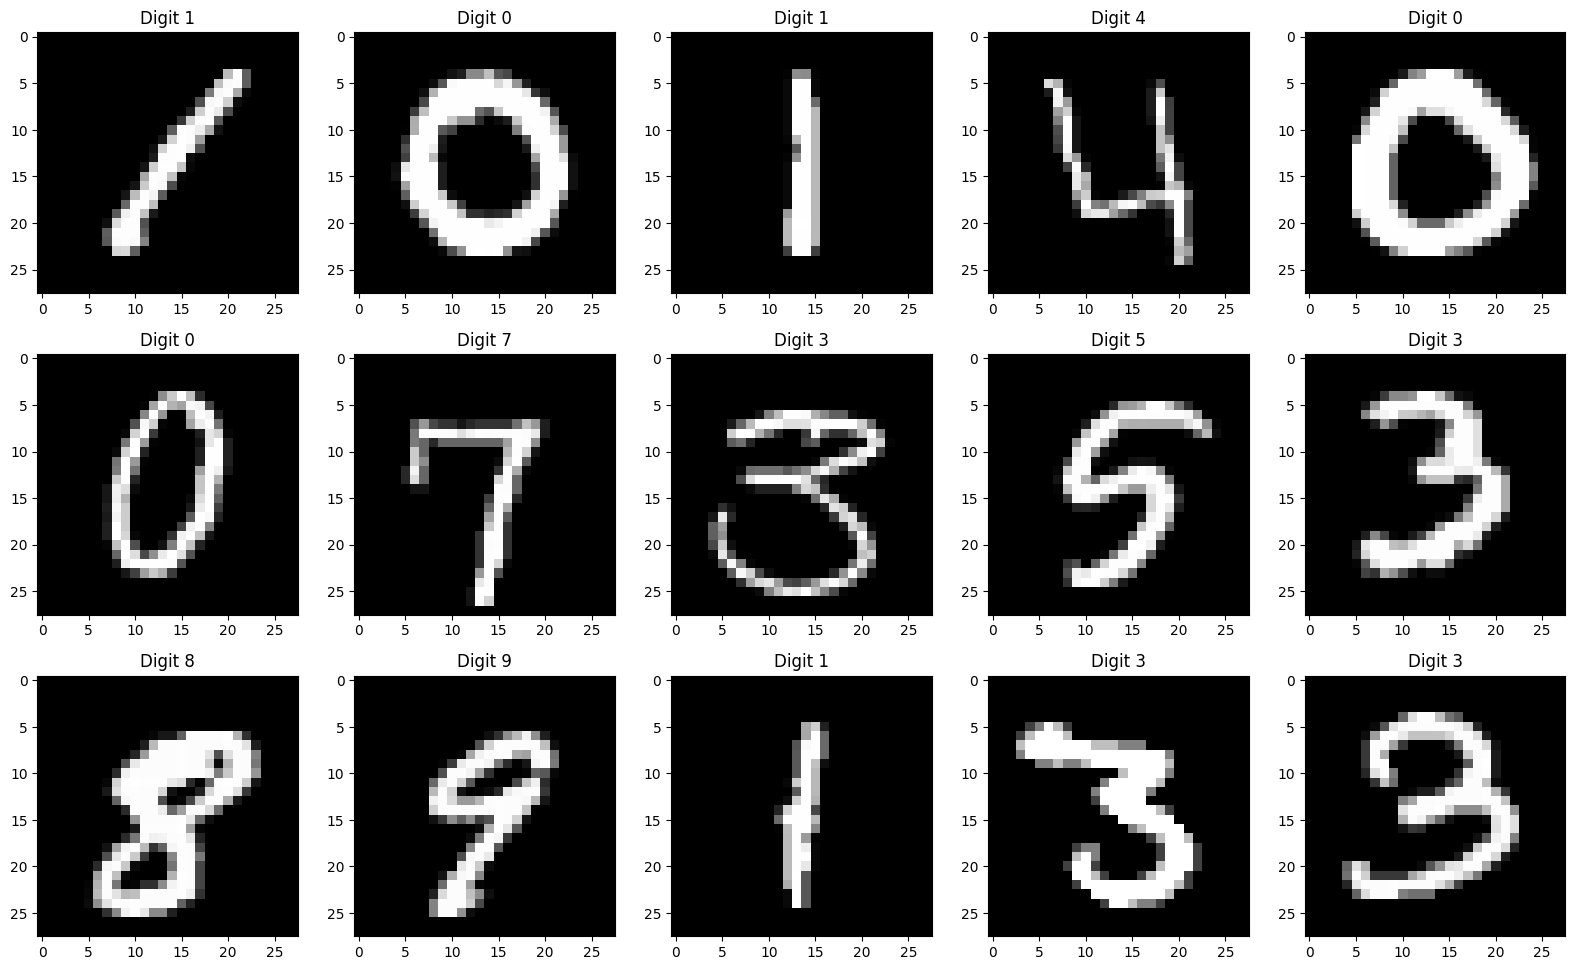

In [5]:
fig = plt.figure(figsize = (16, 16))
for idx in range(15):
    plt.subplot(5, 5,idx+1)
    plt.imshow(X_train_plot[idx], cmap = 'gray')
    plt.title("Digit {}".format(y_train[idx]))

plt.tight_layout()


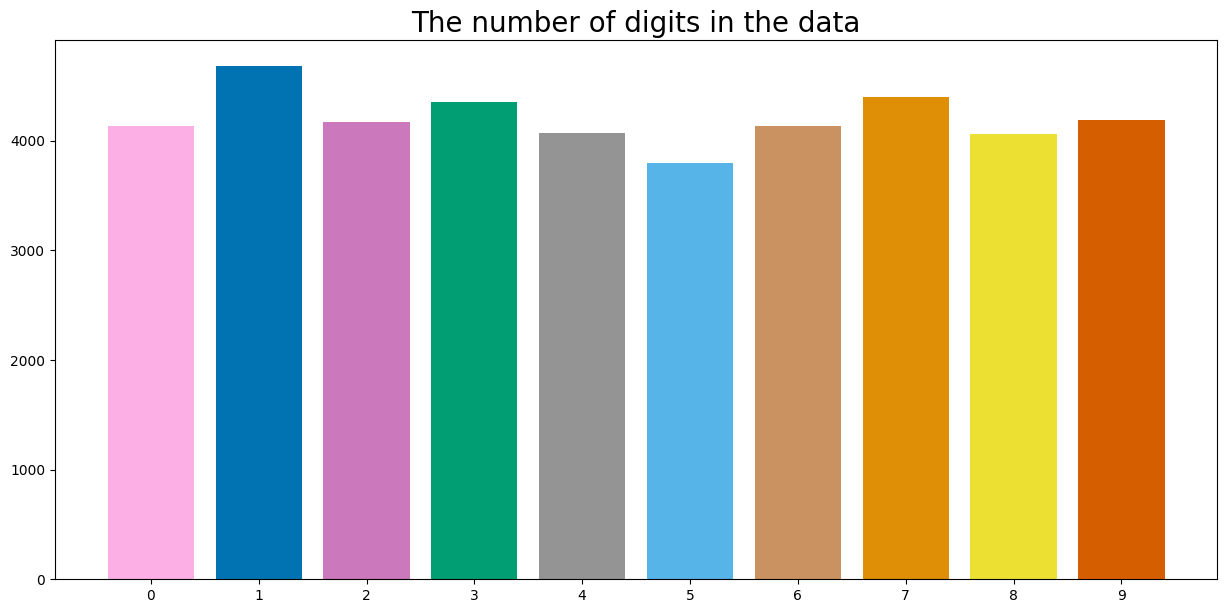

In [6]:
import seaborn as sns
mycolors = sns.color_palette("colorblind", 10)
digit_range = np.arange(10)

val = y_train.value_counts().index
cnt = y_train.value_counts().values

plt.figure(figsize = (15, 7))
plt.title("The number of digits in the data", fontsize = 20)
plt.xticks(range(10))
plt.bar(val, cnt, color = mycolors);

Data Preparing

In [7]:
img_rows, img_cols = 28, 28

num_pixels = X_train.shape[1] 

input_shape = (img_rows, img_cols)

In [8]:
# Data Normalization [0, 1]
X_train /= 255
X_test /= 255

# one-hot encoding for target column
y_train = to_categorical(y_train)

# | [0, 1, 2, ... , 9] | = 10
num_classes = y_train.shape[1]

# Number of objects, vector size (28 * 28)
print(X_train.shape, X_test.shape)

(42000, 784) (28000, 784)


In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 2, stratify=y_train)

In [10]:
def callbacks(name): 
    return [ 
        EarlyStopping(monitor = 'loss', patience = 6), 
        ReduceLROnPlateau(monitor = 'loss', patience = 3), 
        ModelCheckpoint(f'../working/{name}.hdf5', save_best_only=True) # saving the best model
    ]

In [11]:
X_train.shape


(37800, 784)

In [12]:
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_val = X_val.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)
input_shape = (28, 28, 1)

In [13]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape = input_shape))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same' ))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation = 'softmax')) 


In [14]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0

In [15]:
learning_history = model.fit(X_train, y_train,
          batch_size = 128,
          epochs = 10,
          verbose = 1,
          callbacks = callbacks('cnn_v1'),
          validation_data = (X_val, y_val))

Epoch 1/10


2023-02-26 18:34:22.354739: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


296/296 [==============================] - 9s 31ms/step - loss: 0.3899 - accuracy: 0.8711 - val_loss: 0.0691 - val_accuracy: 0.9776 - lr: 0.0010
Epoch 2/10
296/296 [==============================] - 9s 30ms/step - loss: 0.0966 - accuracy: 0.9693 - val_loss: 0.0501 - val_accuracy: 0.9829 - lr: 0.0010
Epoch 3/10
296/296 [==============================] - 9s 31ms/step - loss: 0.0727 - accuracy: 0.9776 - val_loss: 0.0400 - val_accuracy: 0.9857 - lr: 0.0010
Epoch 4/10
296/296 [==============================] - 9s 30ms/step - loss: 0.0580 - accuracy: 0.9816 - val_loss: 0.0308 - val_accuracy: 0.9898 - lr: 0.0010
Epoch 5/10
296/296 [==============================] - 9s 31ms/step - loss: 0.0458 - accuracy: 0.9848 - val_loss: 0.0322 - val_accuracy: 0.9888 - lr: 0.0010
Epoch 6/10
296/296 [==============================] - 9s 31ms/step - loss: 0.0440 - accuracy: 0.9861 - val_loss: 0.0340 - val_accuracy: 0.9900 - lr: 0.0010
Epoch 7/10
296/296 [==============================] - 9s 32ms/step - loss: 

In [16]:
score = model.evaluate(X_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test score:', score[1])


Test loss: 0.027508007362484932
Test score: 0.9916666746139526


In [17]:
print("Total accuracy = ", score[1]*100, "%")

Total accuracy =  99.16666746139526 %


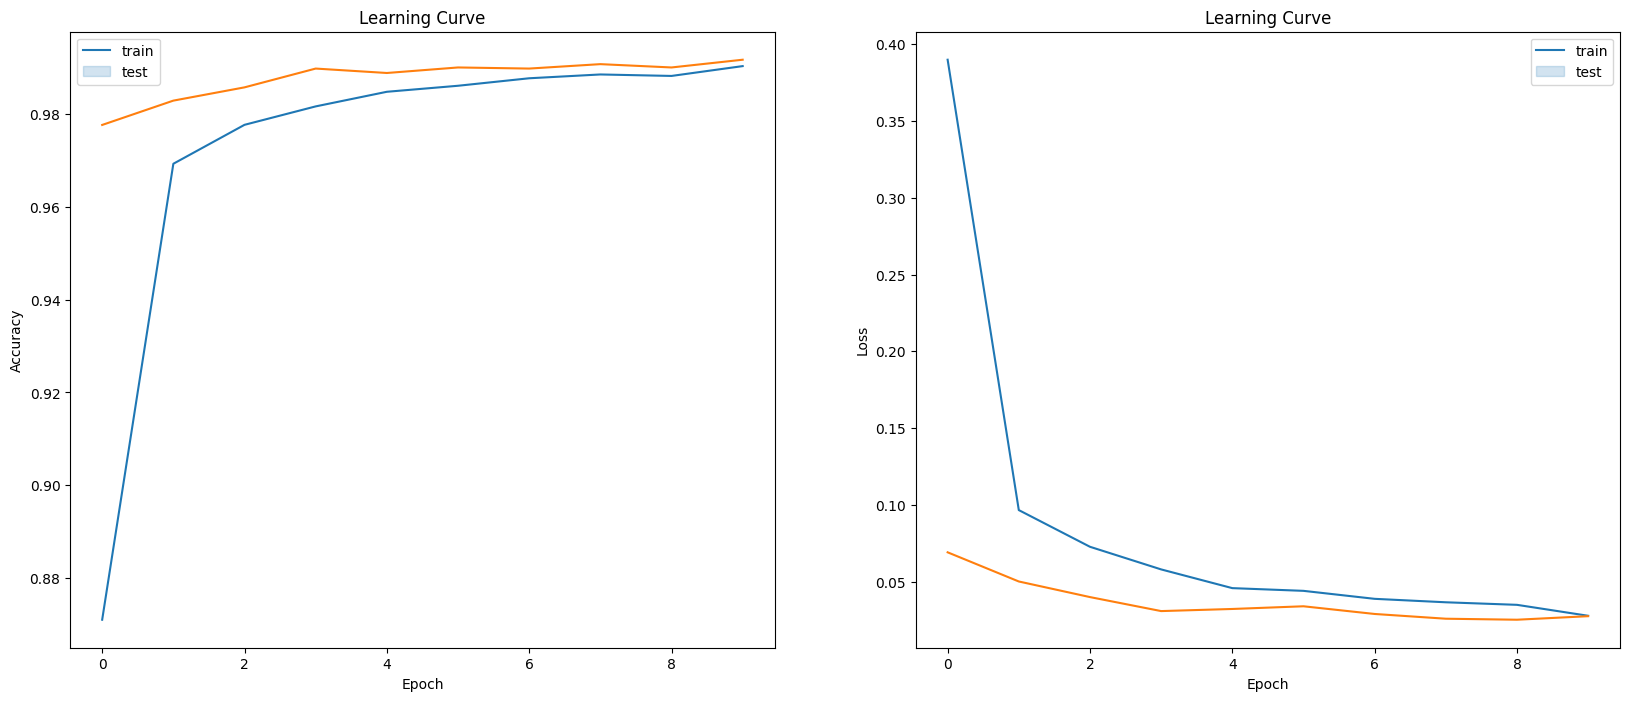

In [18]:
history = learning_history
keys = ['accuracy', 'loss']

plt.figure(figsize=(20,8))
for i, key in enumerate(keys):
    plt.subplot(1, 2, i + 1)
    sns.lineplot(x = history.epoch, y = history.history[key])
    sns.lineplot(x = history.epoch, y = history.history['val_' + key])
    plt.title('Learning Curve')
    plt.ylabel(key.title())
    plt.xlabel('Epoch')
    #plt.ylim(ylim)
    plt.legend(['train', 'test'], loc='best')
plt.show()